In [206]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [207]:
data = pd.read_csv('../raw_data/merged_data.csv')
data.head()

,adm0_name,pt_name,um_name,mp_price,conv_rate,usd_rate,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal
0,Afghanistan,Retail,KG,50.344430,96.252560,0.523045,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
1,Argentina,Retail,KG,114.238000,101.364698,1.127000,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
2,Congo,Retail,KG,1078.371429,581.547941,1.854312,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
3,Gambia,Retail,KG,27.529414,52.500260,0.524367,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0
4,Kyrgyzstan,Retail,KG,52.387667,84.797101,0.617800,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0


Text(0.5, 1.0, 'sodium')

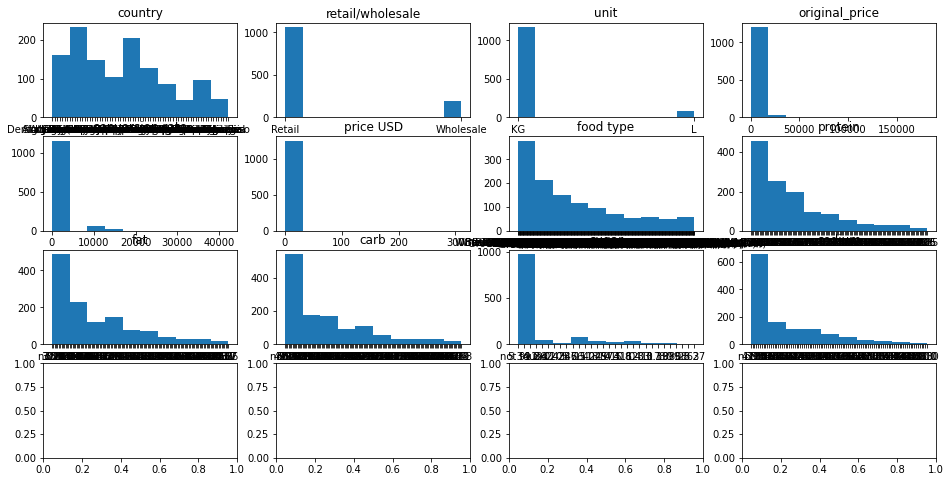

In [186]:
fig,axs = plt.subplots(4,4, figsize=(16,8))

axs[0,0].hist(data['adm0_name'])
axs[0,0].set_title('country')

axs[0,1].hist(data['pt_name'])
axs[0,1].set_title('retail/wholesale')

axs[0,2].hist(data['um_name'])
axs[0,2].set_title('unit')

axs[0,3].hist(data['mp_price'])
axs[0,3].set_title('original_price')

axs[1,0].hist(data['conv_rate'])
axs[1,0].set_title('conversion rate')

axs[1,1].hist(data['usd_rate'])
axs[1,1].set_title('price USD')

axs[1,2].hist(data['food_type'])
axs[1,2].set_title('food type')

axs[1,3].hist(data['protein'])
axs[1,3].set_title('protein')

axs[2,0].hist(data['fat'])
axs[2,0].set_title('fat')

axs[2,1].hist(data['carb'])
axs[2,1].set_title('carb')


axs[2,2].hist(data['sugar'])
axs[2,2].set_title('sugar')

axs[2,3].hist(data['sodium'])
axs[2,3].set_title('sodium')


In [208]:
cpi = pd.read_csv('../raw_data/cpi_short.csv')
cpi.drop(columns=['Unnamed: 0'],inplace=True)

In [209]:
cpi

,Country Name,2019
0,Afghanistan,149.895975
1,Angola,378.883721
2,Argentina,NaN
3,Armenia,129.176007
4,Burundi,182.112340
...,...,...
66,Turkey,234.437126
67,Uganda,173.871268
68,Yemen,NaN
69,Zambia,212.308759


In [210]:
data.sort_values(by='adm0_name')
data[data['adm0_name'] == 'Afghanistan'].shape

(9, 15)

In [211]:
new_data[new_data['adm0_name'] == 'Afghanistan'].shape

(9, 17)

In [212]:
new_data = pd.merge(left=data,right=cpi,left_on='adm0_name', right_on='Country Name')
new_data.head()

,adm0_name,pt_name,um_name,mp_price,conv_rate,usd_rate,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal,Country Name,2019
0,Afghanistan,Retail,KG,50.344430,96.25256,0.523045,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0,Afghanistan,149.895975
1,Afghanistan,Retail,KG,103.044485,96.25256,1.070564,Oil (cooking),1.26,3.24,30.9,not found,116,0.0,3.0,144,Afghanistan,149.895975
2,Afghanistan,Retail,KG,95.488971,96.25256,0.992067,Pulses,17.9,7.14,60.7,not found,393,0.0,107,393,Afghanistan,149.895975
3,Afghanistan,Retail,KG,87.189706,96.25256,0.905843,Rice (high quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365,Afghanistan,149.895975
4,Afghanistan,Retail,KG,48.832043,96.25256,0.507332,Rice (low quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365,Afghanistan,149.895975


In [214]:
new_data.drop(columns=['mp_price', 'conv_rate','Country Name','adm0_name'], inplace=True)

In [215]:
new_data.duplicated().sum()

0

In [216]:
new_data

,pt_name,um_name,usd_rate,food_type,protein,fat,carb,sugar,sodium,cholesterol,calcium,kcal,2019
0,Retail,KG,0.523045,Bread,9.43,3.59,49.2,5.34,477,not found,211,1130.0,149.895975
1,Retail,KG,1.070564,Oil (cooking),1.26,3.24,30.9,not found,116,0.0,3.0,144,149.895975
2,Retail,KG,0.992067,Pulses,17.9,7.14,60.7,not found,393,0.0,107,393,149.895975
3,Retail,KG,0.905843,Rice (high quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365,149.895975
4,Retail,KG,0.507332,Rice (low quality),7.19,3.85,75.5,not found,1.0,not found,10.0,365,149.895975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Retail,KG,0.388252,Maize (local),8.75,5.09,73.9,not found,5.0,not found,5.0,364,109.251270
1248,Retail,KG,0.788318,"Rice (ordinary, first quality)",7.19,3.85,75.5,not found,1.0,not found,10.0,365,109.251270
1249,Retail,KG,0.372227,Maize (imported),8.75,5.09,73.9,not found,5.0,not found,5.0,364,109.251270
1250,Retail,KG,1.714250,Cocoa,20.0,20.0,10.0,not found,0.0,0.0,not found,300,NaN


In [217]:
#delete sugar and cholesterol
#new_data.drop(columns=['sugar','cholesterol'])

,pt_name,um_name,usd_rate,food_type,protein,fat,carb,sodium,calcium,kcal,2019
0,Retail,KG,0.523045,Bread,9.43,3.59,49.2,477,211,1130.0,149.895975
1,Retail,KG,1.070564,Oil (cooking),1.26,3.24,30.9,116,3.0,144,149.895975
2,Retail,KG,0.992067,Pulses,17.9,7.14,60.7,393,107,393,149.895975
3,Retail,KG,0.905843,Rice (high quality),7.19,3.85,75.5,1.0,10.0,365,149.895975
4,Retail,KG,0.507332,Rice (low quality),7.19,3.85,75.5,1.0,10.0,365,149.895975
...,...,...,...,...,...,...,...,...,...,...,...
1247,Retail,KG,0.388252,Maize (local),8.75,5.09,73.9,5.0,5.0,364,109.251270
1248,Retail,KG,0.788318,"Rice (ordinary, first quality)",7.19,3.85,75.5,1.0,10.0,365,109.251270
1249,Retail,KG,0.372227,Maize (imported),8.75,5.09,73.9,5.0,5.0,364,109.251270
1250,Retail,KG,1.714250,Cocoa,20.0,20.0,10.0,0.0,not found,300,NaN


In [194]:
new_data.um_name.value_counts().sort_values(ascending=False)/len(new_data)

KG    0.932907
L     0.067093
Name: um_name, dtype: float64

In [219]:
#declaring X and y with the good features
y = new_data['usd_rate']
X = new_data[['pt_name','protein','fat','carb','sodium','calcium','kcal','2019']]
X.head()

,pt_name,protein,fat,carb,sodium,calcium,kcal,2019
0,Retail,9.43,3.59,49.2,477,211,1130.0,149.895975
1,Retail,1.26,3.24,30.9,116,3.0,144,149.895975
2,Retail,17.9,7.14,60.7,393,107,393,149.895975
3,Retail,7.19,3.85,75.5,1.0,10.0,365,149.895975
4,Retail,7.19,3.85,75.5,1.0,10.0,365,149.895975


In [220]:
#replacing the not found with 0 
X = X.replace('not found', np.nan)

In [221]:
X.fat.isnull().sum()

26

In [222]:
#imputing values with KNN imputer
from sklearn.impute import KNNImputer

k_imputer = KNNImputer(n_neighbors=4)

## prepare the scaling and encoding with a pipeline

In this part of the notebook we will use a pipeline to make all the scalings and encodigns in one step

In [223]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


num_trans = Pipeline([
    ('imputer', KNNImputer(n_neighbors=4)),
    ('sclaer', MinMaxScaler())
])

cat_trans = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer([
    ('num_trans', num_trans, ['protein','fat','carb','sodium','calcium','kcal','2019']),
    ('cat_trans', cat_trans, ['pt_name'])
])

In [228]:
from sklearn import set_config; set_config()
display(preprocessor)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num_trans',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  KNNImputer(add_indicator=False,
                                                             copy=True,
                                                             metric='nan_euclidean',
                                                             missing_values=nan,
                                                             n_neighbors=4,
                                                             weights='uniform')),
                                                 ('sclaer',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                              

In [229]:
X_t =  preprocessor.fit_transform(X)
X_t

array([[1.18022528e-01, 3.59000000e-02, 4.93975904e-01, ...,
        2.83908439e-03, 1.00000000e+00, 0.00000000e+00],
       [1.57697121e-02, 3.24000000e-02, 3.10240964e-01, ...,
        2.83908439e-03, 1.00000000e+00, 0.00000000e+00],
       [2.24030038e-01, 7.14000000e-02, 6.09437751e-01, ...,
        2.83908439e-03, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.09511890e-01, 5.09000000e-02, 7.41967871e-01, ...,
        2.40933827e-04, 1.00000000e+00, 0.00000000e+00],
       [2.50312891e-01, 2.00000000e-01, 1.00401606e-01, ...,
        2.50748398e-01, 1.00000000e+00, 0.00000000e+00],
       [5.13141427e-02, 2.50000000e-03, 4.83935743e-02, ...,
        5.68568710e-03, 1.00000000e+00, 0.00000000e+00]])

In [230]:
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8
0,0.118023,0.0359,0.493976,0.113842,0.243649,0.305405,0.002839,1.0,0.0
1,0.015770,0.0324,0.310241,0.027685,0.003464,0.038919,0.002839,1.0,0.0
2,0.224030,0.0714,0.609438,0.093795,0.123557,0.106216,0.002839,1.0,0.0
3,0.089987,0.0385,0.758032,0.000239,0.011547,0.098649,0.002839,1.0,0.0
4,0.089987,0.0385,0.758032,0.000239,0.011547,0.098649,0.002839,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1247,0.109512,0.0509,0.741968,0.001193,0.005774,0.098378,0.000241,1.0,0.0
1248,0.089987,0.0385,0.758032,0.000239,0.011547,0.098649,0.000241,1.0,0.0
1249,0.109512,0.0509,0.741968,0.001193,0.005774,0.098378,0.000241,1.0,0.0
1250,0.250313,0.2000,0.100402,0.000000,0.171189,0.081081,0.250748,1.0,0.0


##  X and y and splitting 

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.3)


### Basic Linear Model

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [234]:
base_model = LinearRegression()

cv_results = cross_validate(base_model, X_train, y_train, cv=5, scoring = ['max_error','r2','neg_mean_squared_error','neg_mean_absolute_error'])
cv_results

{'fit_time': array([0.01006007, 0.00097108, 0.00096321, 0.00094938, 0.00079823]),
 'score_time': array([0.00155115, 0.00102472, 0.00183702, 0.00105047, 0.00132942]),
 'test_max_error': array([-34.29080444, -53.49442634, -24.99107503, -18.77216668,
        -36.79084175]),
 'test_r2': array([0.00544179, 0.02710324, 0.00410927, 0.00396277, 0.02471032]),
 'test_neg_mean_squared_error': array([-13.17436213, -36.8889491 ,  -5.81082899,  -7.75886345,
        -21.72138361]),
 'test_neg_mean_absolute_error': array([-1.58737655, -1.84875248, -1.25551963, -1.60424666, -1.75234058])}

In [235]:
base_model_results = pd.DataFrame(cv_results)

In [236]:
cv_results['test_r2'].mean()

0.01306547872394288

In [237]:
base_results_comparisson = {
    'test_max_error': cv_results['test_max_error'].mean(),
    'test_r2': cv_results['test_r2'].mean(),
    'test_neg_mean_squared_error': cv_results['test_neg_mean_squared_error'].mean(),
    'test_neg_mean_absolute_error': cv_results['test_neg_mean_absolute_error'].mean()
}
base_results_comparisson

{'test_max_error': -33.66786284806892,
 'test_r2': 0.01306547872394288,
 'test_neg_mean_squared_error': -17.07087745663042,
 'test_neg_mean_absolute_error': -1.609647179488769}

### Basic KNN regression model

In [250]:
from sklearn.neighbors import KNeighborsRegressor

k_model = KNeighborsRegressor(n_neighbors=50)

In [251]:
cv_results_k = cross_validate(k_model, X_train, y_train, cv=5, scoring = ['max_error','r2','neg_mean_squared_error','neg_mean_absolute_error'] )

In [252]:
k_model_results = {
    'test_max_error': cv_results_k['test_max_error'].mean(),
    'test_r2': cv_results_k['test_r2'].mean(),
    'test_neg_mean_squared_error': cv_results_k['test_neg_mean_squared_error'].mean(),
    'test_neg_mean_absolute_error': cv_results_k['test_neg_mean_absolute_error'].mean()
}
k_model_results

{'test_max_error': -33.87968304907976,
 'test_r2': 0.05275128979964179,
 'test_neg_mean_squared_error': -16.88106854002008,
 'test_neg_mean_absolute_error': -1.453497131331241}

### Basic Ridge regressor

In [261]:
from sklearn.linear_model import Ridge

r_model = Ridge(alpha=0.8)

In [262]:
cv_results_r = cross_validate(r_model, X_train, y_train, cv=5, scoring = ['max_error','r2','neg_mean_squared_error','neg_mean_absolute_error'])

In [263]:
r_model_results = {
    'test_max_error': cv_results_r['test_max_error'].mean(),
    'test_r2': cv_results_r['test_r2'].mean(),
    'test_neg_mean_squared_error': cv_results_r['test_neg_mean_squared_error'].mean(),
    'test_neg_mean_absolute_error': cv_results_r['test_neg_mean_absolute_error'].mean()
}
r_model_results

{'test_max_error': -33.67379124185702,
 'test_r2': 0.020456603611091008,
 'test_neg_mean_squared_error': -17.000002779419976,
 'test_neg_mean_absolute_error': -1.6052398589270602}